In [1]:
from biosonic import handle, compute, plot
from biosonic.compute import pitch

## Read file and plot spectrogram

In [2]:
x, sr, n_ch, quant = handle.read_wav("GT00211_G00908_Julian_distance.wav")
print(f"sampling rate: {sr}, number of channels: {n_ch}, quantization: {quant}")

sampling rate: 44100, number of channels: 1, quantization: float32


/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:104: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


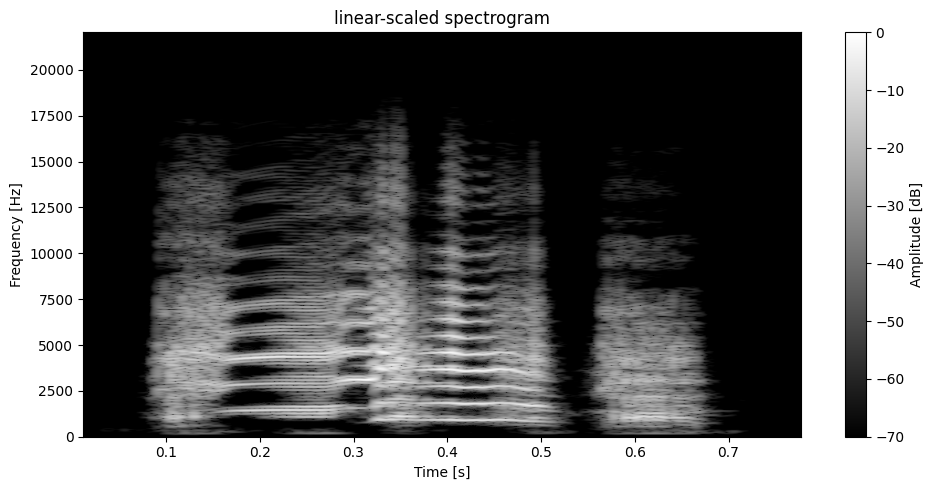

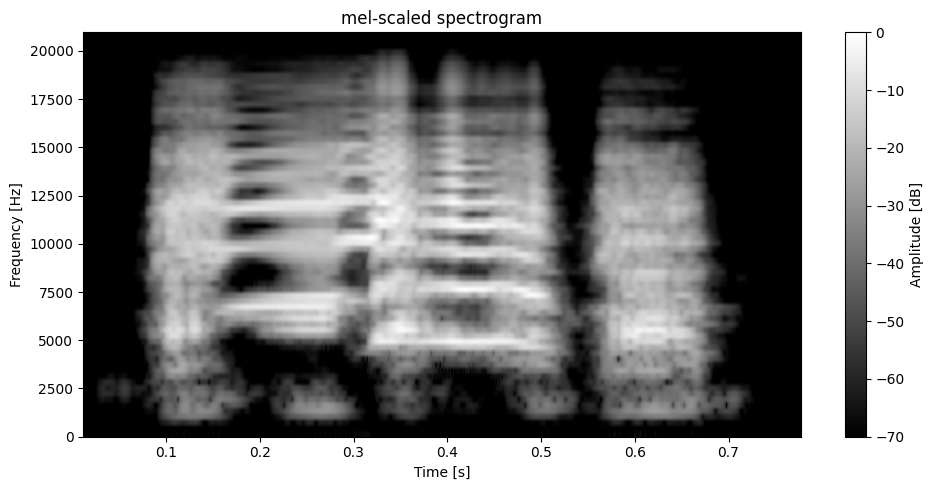

In [3]:
window_length = 1024

# display , ,bwith a dynamic range of 70 dB, first linearly scaled, then mel scaled with a custom corner frequency
plot.plot_spectrogram(x, sr=sr, window_length=window_length, overlap=95, dynamic_range=70)
plot.plot_spectrogram(x, sr=sr, window_length=window_length, overlap=95, dynamic_range=70, freq_scale="mel", n_bands=70)

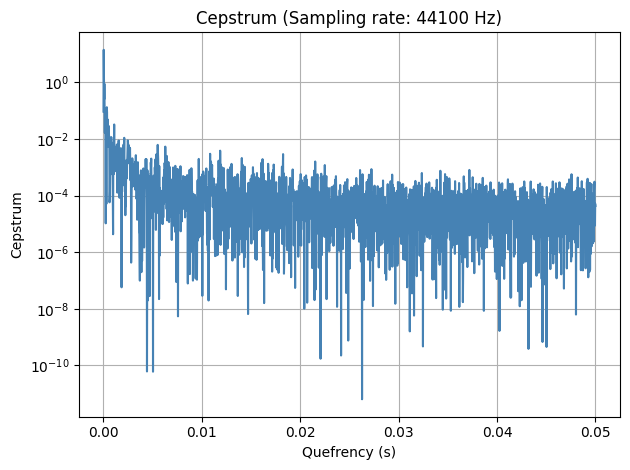

In [4]:
ceps, _ = compute.spectrotemporal.cepstrum(x, sr)
plot.plot_cepstrum(x, sr)

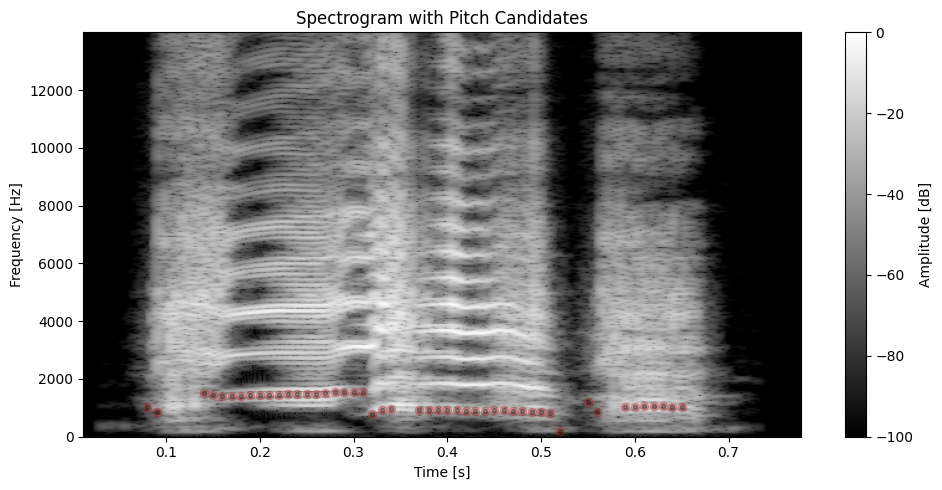

In [5]:
# praat autocorrelation pitch tracking
time_points, candidates = pitch.boersma(x, sr, min_pitch=100, max_pitch=2000, voicing_thresh=.4, timestep=0.01)
Sx, t, f = compute.spectrotemporal.spectrogram(x, sr=sr, window='hann', window_length=window_length, overlap=95)
plot.plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=window_length, overlap=95, flim=(0,14000))

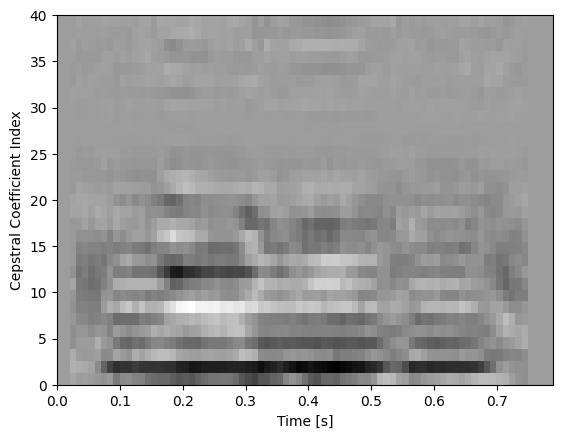

In [6]:
plot.plot_cepstral_coefficients(x, sr, window_length)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:303: RuntimeWarning: divide by zero encountered in log10
  spectrogram_db = 20 * np.log10(np.abs(spec))


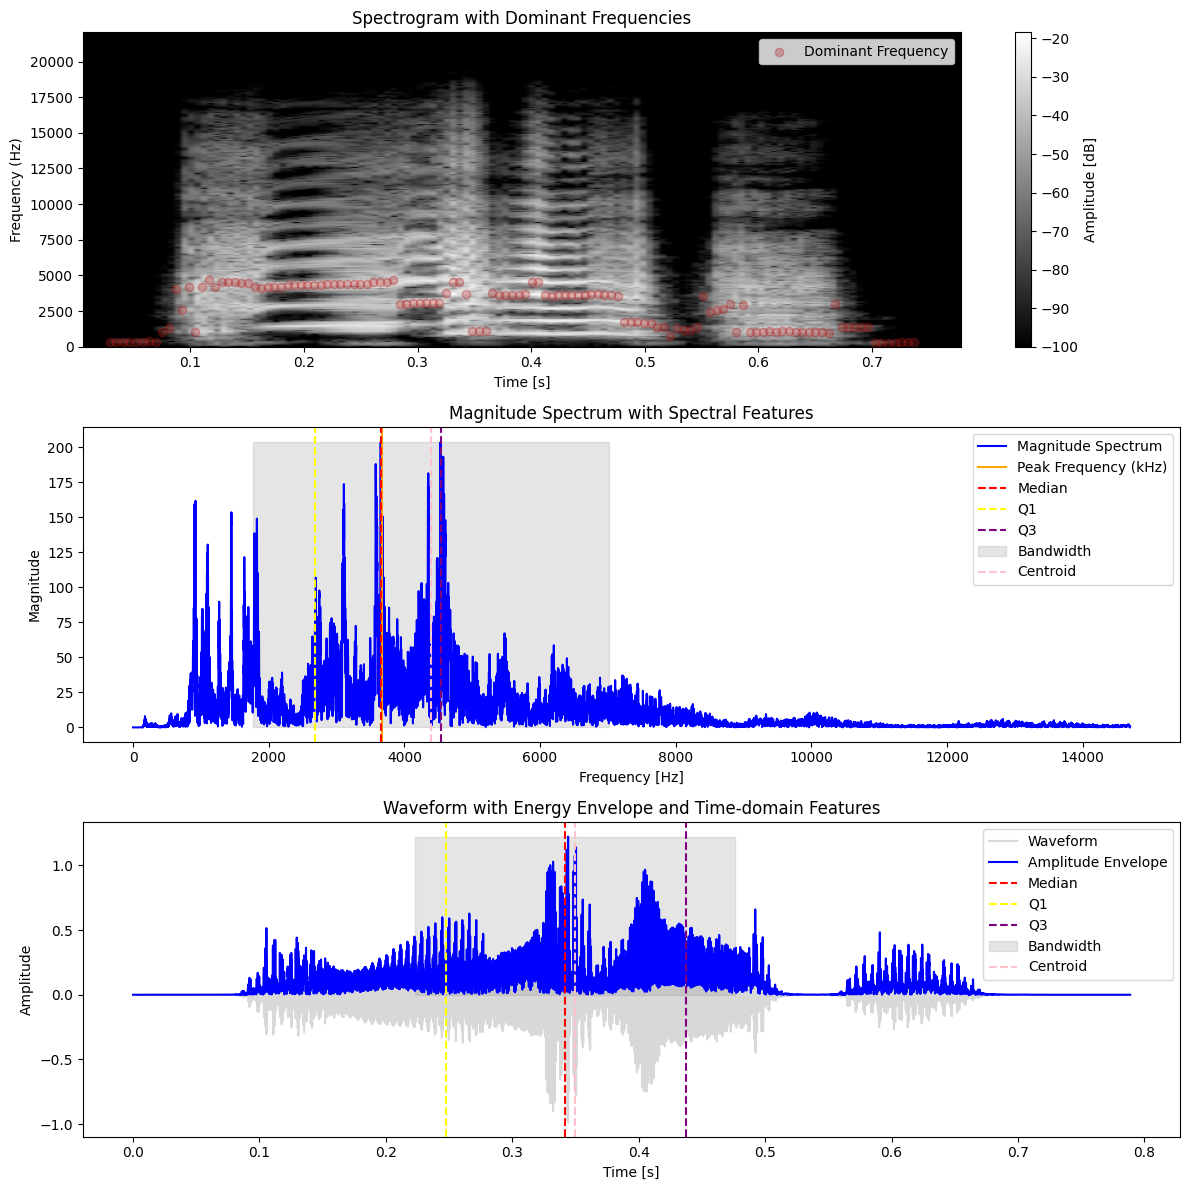

In [7]:
features = compute.utils.extract_all_features(x, sr)
plot.plot_features(x, sr)

In [8]:
features

{'t_q1': 0.2472108843537415,
 't_median': 0.3418140589569161,
 't_q3': 0.43732426303854877,
 'temporal_centroid': np.float64(0.3498858195727226),
 'temporal_sd': 0.126491978764534,
 'temporal_skew': 2.0511105060577393,
 'temporal_kurtosis': 6.910249710083008,
 'amplitude_envelope': array([2.4457245e-07, 1.3555872e-07, 3.3347465e-07, ..., 2.6672060e-07,
        2.7988116e-07, 1.6845513e-07], shape=(34783,), dtype=float32),
 'duration': 0.7029478458049887,
 'fq_q1': np.float64(2689.1326222579996),
 'fq_median': np.float64(3652.706782048702),
 'fq_q3': np.float64(4533.869993962568),
 'spectral_flatness': np.float32(0.0015890924),
 'spectral_centroid': np.float64(4397.607078920699),
 'spectral_sd': np.float64(2623.100388907981),
 'spectral_skew': np.float64(1.402042338962974),
 'spectral_kurtosis': np.float64(6.020084137421188),
 'peak_frequency': 3665.385389414369,
 'spectrotemporal_entropy': 0.4952921531292712,
 'dominant_freqs': array([         nan,          nan,          nan,          

## Batch normalize files in a folder and export features as csv

In [9]:
handle.batch_normalize_wav_files(".", 44100, 1, "float32")

Normalized: Pica_pica_Magpie_12#45.wav -> normalized/Pica_pica_Magpie_12#45.wav
Normalized: GT00211_G00908_Julian_distance.wav -> normalized/GT00211_G00908_Julian_distance.wav
Normalized: Sturnus_vulgaris_Starling_10#20.wav -> normalized/Sturnus_vulgaris_Starling_10#20.wav


In [10]:
handle.batch_extract_features("normalized", save_csv_path="normalized/extracted_features.csv")

processing Pica_pica_Magpie_12#45.wav
processing GT00211_G00908_Julian_distance.wav
processing Sturnus_vulgaris_Starling_10#20.wav
Features saved to: normalized/extracted_features.csv


,t_q1,t_median,t_q3,temporal_centroid,temporal_sd,temporal_skew,temporal_kurtosis,amplitude_envelope,duration,fq_q1,...,spectral_kurtosis,peak_frequency,spectrotemporal_entropy,dominant_freqs,mean_dom,min_dom,max_dom,range_dom,mod_dom,filename
0,6.647256,13.488821,39.570862,24.561517,0.061462,4.453168,25.357672,"[2.5440222e-05, 3.400955e-05, 2.5448338e-05, 3...",79.730816,2874.206107,...,6.146851,3022.660305,0.367757,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6356.379914,689.062500,21963.867188,21274.804688,2210.485830,Pica_pica_Magpie_12#45.wav
1,0.247211,0.341814,0.437324,0.349886,0.126492,2.051111,6.910250,"[2.4457245e-07, 1.3555872e-07, 3.3347465e-07, ...",0.702948,2689.132622,...,6.020084,3665.385389,0.495292,"[nan, nan, nan, nan, 344.53125, 344.53125, 344...",2647.008384,258.398438,4651.171875,4392.773438,10.431373,GT00211_G00908_Julian_distance.wav
2,51.602494,98.482585,144.246939,92.980398,0.091809,3.255799,13.761450,"[4.746566e-05, 4.3317694e-05, 4.746617e-05, 4....",167.422993,2586.052814,...,13.514755,2477.127537,0.606184,"[nan, nan, nan, nan, nan, nan, nan, 15417.7734...",3960.221747,86.132812,21963.867188,21877.734375,709.503937,Sturnus_vulgaris_Starling_10#20.wav
